# 1.4 KNN Model

## This script contains the following:

### 1. Importing your libraries and data
### 2. Preprocessing data frames
### 3. Split data into training and test sets
### 4. Run KNN model 
### 5. Multitable confusion matrix
### 6. Calculate the accuracy

## 01. Importing your libraries and data

In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from mpl_toolkits import mplot3d
from plotly.offline import download_plotlyjs, init_notebook_mode
from plotly.offline import plot, iplot
import plotly.graph_objects as go
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Ensures the charts created are displayed in the notebook without the need to "call" them.
%matplotlib inline

In [3]:
# Create path
path = r'C:\Users\Quinn\Documents\CF - Data Analysis\Machine Learning\ClimateWins'

In [4]:
# Import the dataset
climate = pd.read_pickle(os.path.join(path, '02 Data Sets', 'ClimateWin_Scaled.pkl'))
climate

,DATE,MONTH,id,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,-1.731975,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,19600102,1,-1.731824,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,19600103,1,-1.731673,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,19600104,1,-1.731523,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,19600105,1,-1.731372,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,1.731372,-1.833187,-0.02793,0.284075,1.037367,-0.005632,-0.004619,-0.179228,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22946,20221028,10,1.731523,0.244897,-0.02793,0.103401,0.976231,-0.005632,-0.004619,-0.179228,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22947,20221029,10,1.731673,-0.586336,-0.02793,0.013064,0.716402,-0.005632,-0.004619,-0.179228,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22948,20221030,10,1.731824,-0.170720,-0.02793,0.374412,0.487141,-0.005632,-0.004619,-0.179228,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530


In [5]:
pleasant = pd.read_csv(os.path.join(path, '02 Data Sets', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))
pleasant

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 02. Preprocessing data frames

In [6]:
# listing the location names from climate
locations_A = list({x.split("_")[0] for x in climate.columns if x not in ["MONTH", "DATE"]})
locations_A.sort()
locations_A

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'GDANSK',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'ROMA',
 'SONNBLICK',
 'STOCKHOLM',
 'TOURS',
 'VALENTIA',
 'id']

In [7]:
# listing the location names from df_y
locations_B = list({x.split("_")[0] for x in pleasant.columns if x not in ["MONTH", "DATE"]})
locations_B.sort()
locations_B

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA']

In [26]:
# finding the cities existing only in locations_A, not in locations_B
noname = [i for i in locations_A if i not in locations_B]
noname

['GDANSK', 'ROMA', 'TOURS', 'id']

In [27]:
# delete columns that the city name is in noname list ['GDANSK', 'ROMA', 'TOURS'. 'id']
for col in climate.columns:
    if col.split('_')[0] in noname:
        climate.drop(columns=col, inplace=True)

## 03. Split data into training and test sets

In [11]:
#Create an 'X' matrix by dropping the unneeded columns.
X = climate.drop(['DATE', 'MONTH'], axis=1)
y = pleasant.drop(['DATE'], axis=1)

In [12]:
print(X.shape)
print(y.shape)

(22950, 147)
(22950, 15)


In [13]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 147)
(5738, 147)
(17212, 15)
(5738, 15)


## 04. Run KNN model 

In [15]:
# Add new library
from sklearn.multioutput import MultiOutputClassifier

In [16]:
#Run the model with neighbors equal to 1 to 4, test the accuracy
k_range = np.arange(1,4)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))
scores = {}
scores_list = []
for i, k in enumerate(k_range):
    print("i -", i)
    print("k -", k_range)
    knn = KNeighborsClassifier(n_neighbors=k)
    classifier = MultiOutputClassifier(knn, n_jobs=-1) #Accomodate a multilabel answer set
    ## Fit the model on the training data.
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    train_acc[i] = knn.score(X_train, np.array(y_train)) #Change this line to accomodate multilabel
    test_acc[i] = knn.score(X_test, np.array(y_test)) #Change this line to accomodate multilabel

i - 0
k - [1 2 3]
i - 1
k - [1 2 3]
i - 2
k - [1 2 3]


Text(0, 0.5, 'Accuracy')

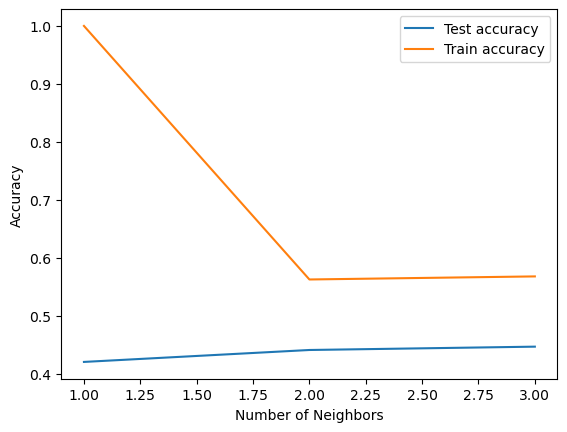

In [17]:
#plot the relationship between number of neighbors and accuracy
plt.plot(k_range, test_acc, label = 'Test accuracy')
plt.plot(k_range, train_acc, label = 'Train accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')

#### From the resulting graph, the testing data is fairly robust until there are more than 2 neighbors. Once it hits around 2, the comparison begins to degrade, and the results become less accurate. 

## 05. Multitable confusion matrix

In [18]:
#Use a multilabel confusion matrix to plot all 15 matrices at once
locations = list({x.split("_")[0] for x in climate.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA']

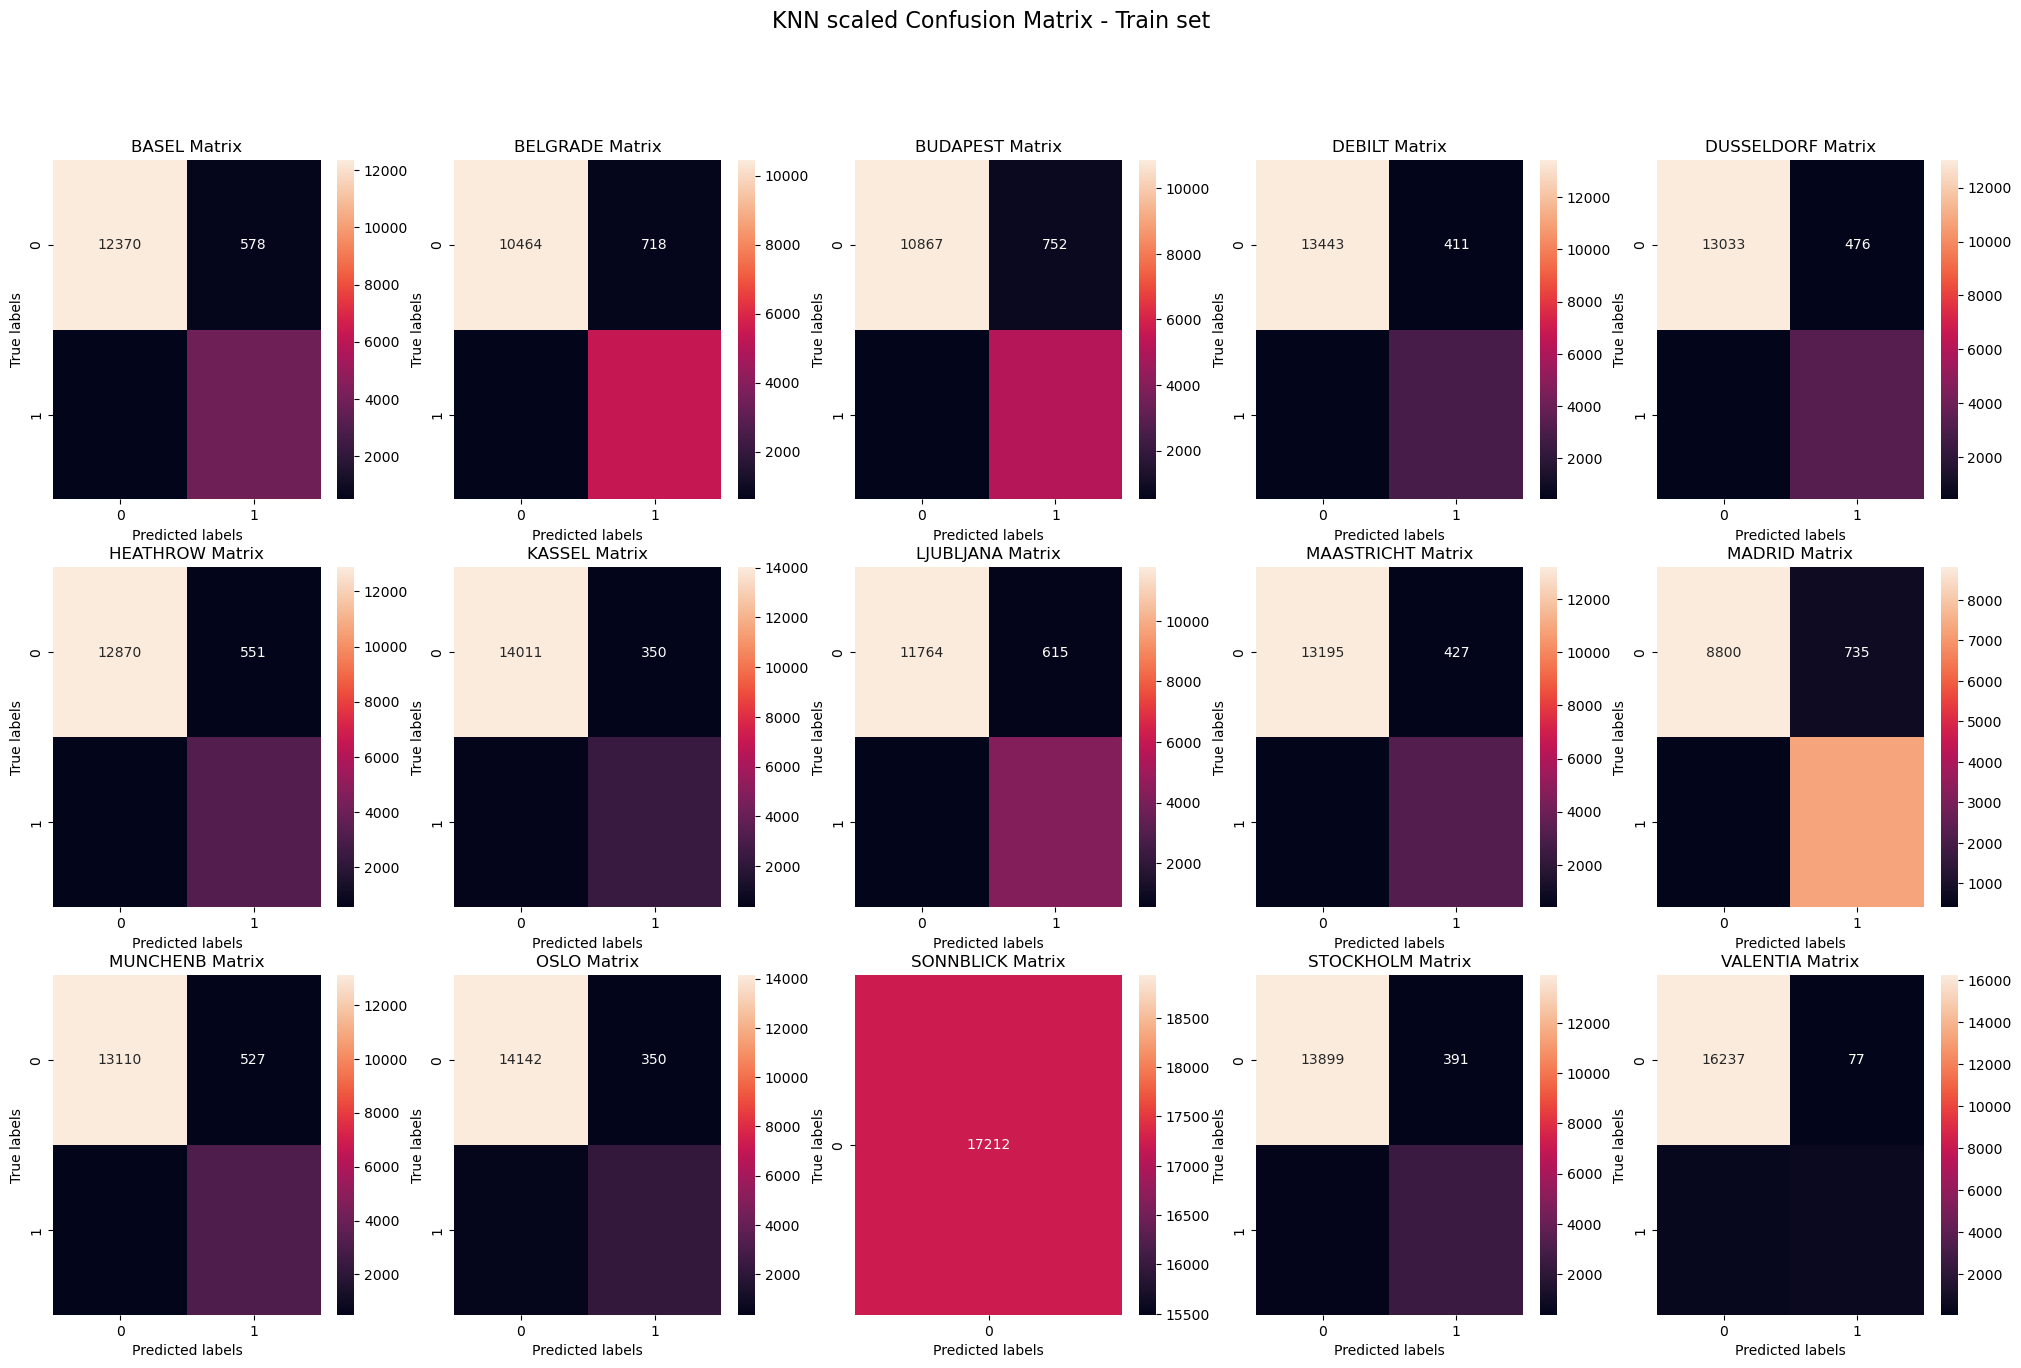

In [19]:
y_pred_train = knn.predict(X_train)
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
figure.suptitle('KNN scaled Confusion Matrix - Train set', fontsize=16)

labels = ['pleasant', 'unpleasant']   
count=0
accuracy_scores_train = {}
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred_train[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1
plt.show() 

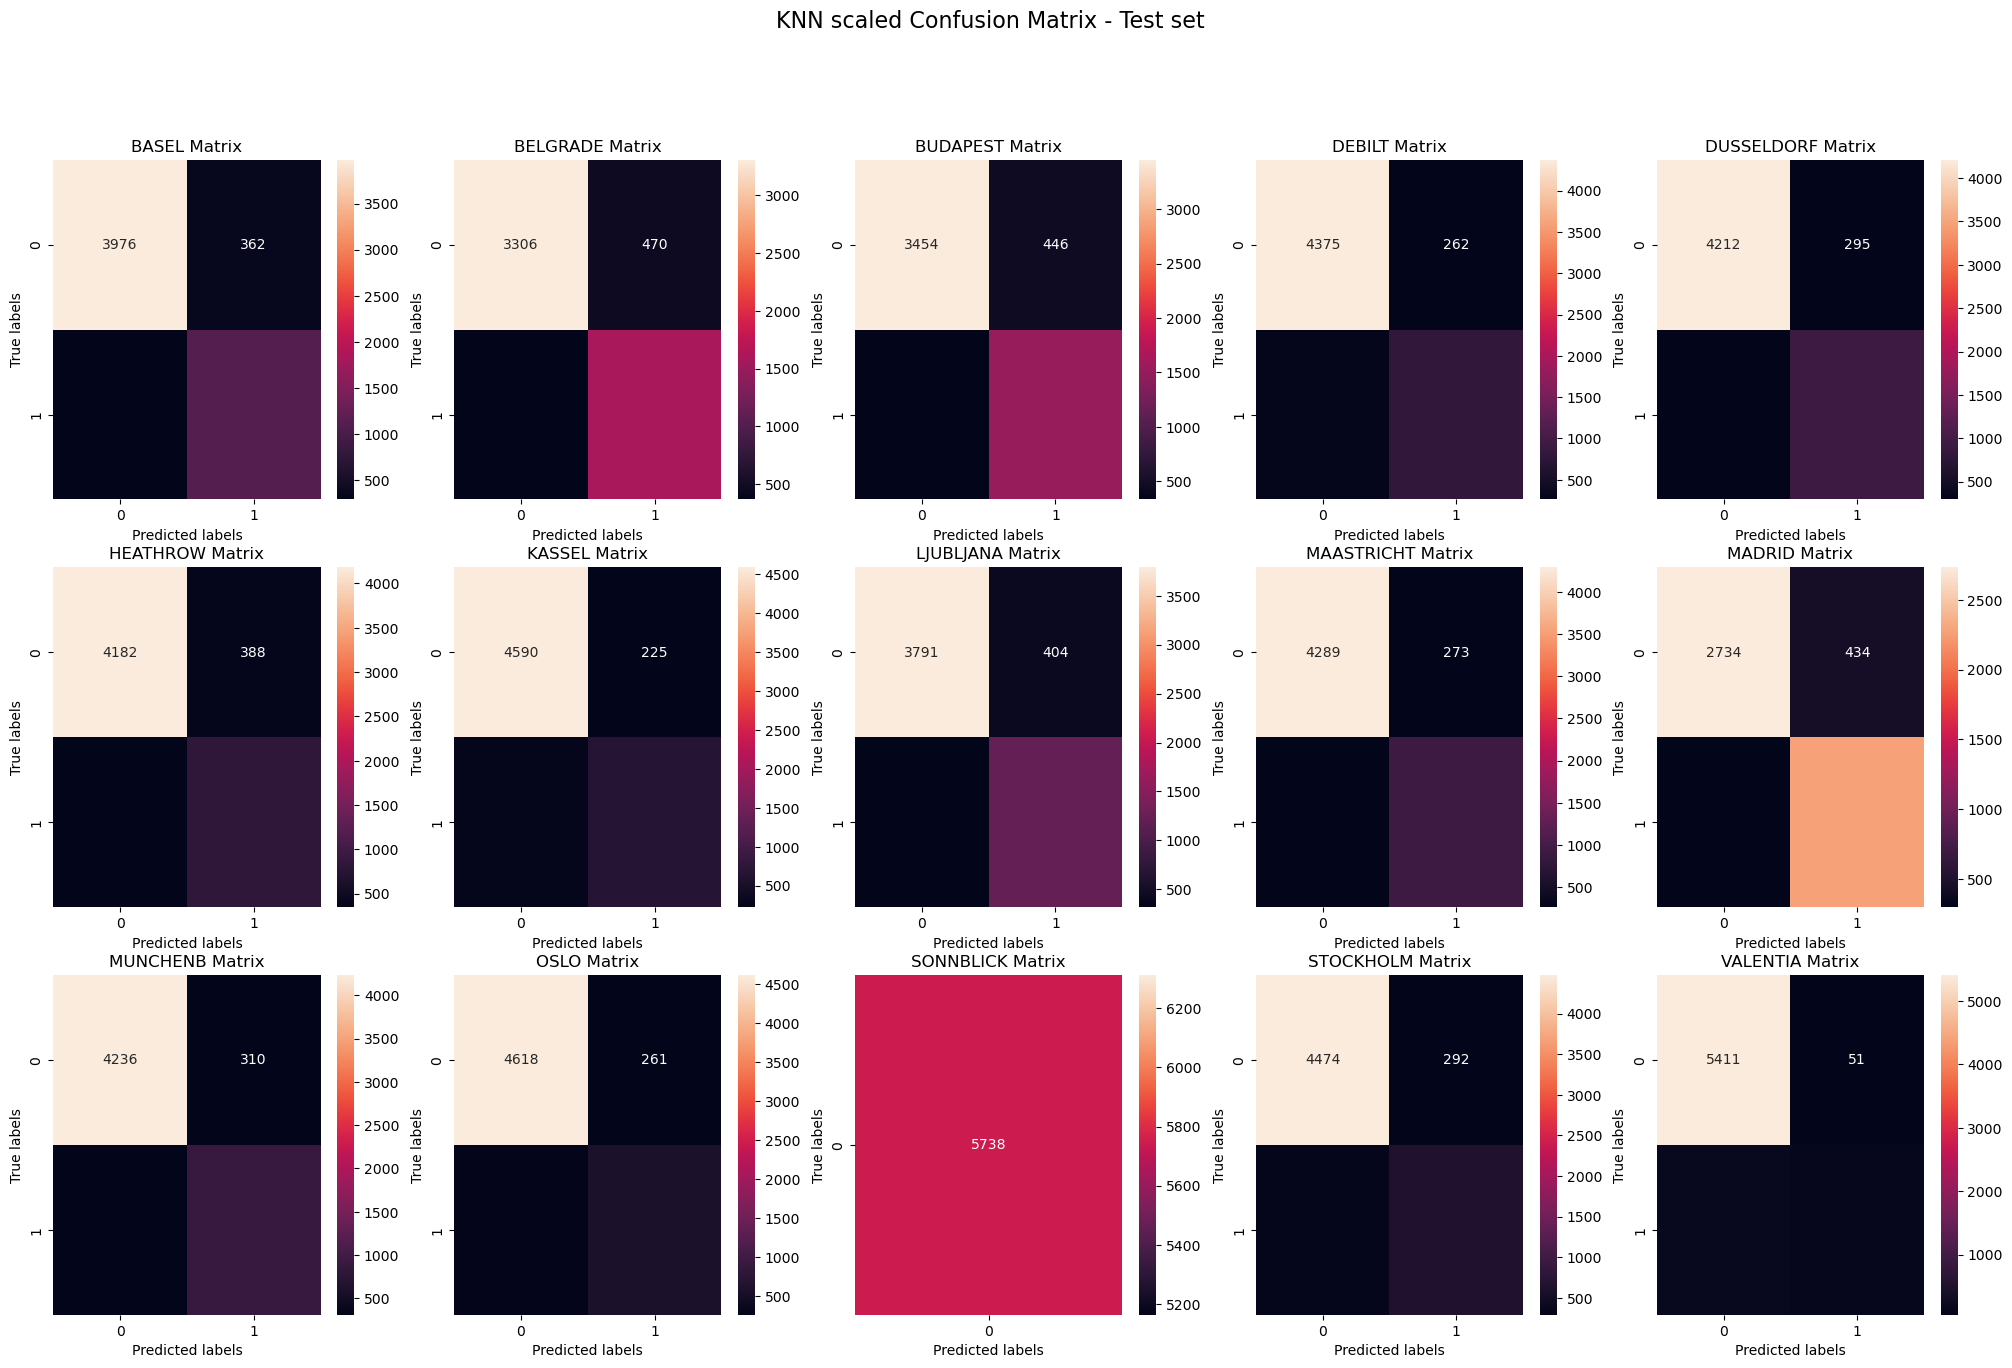

In [20]:
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
figure.suptitle('KNN scaled Confusion Matrix - Test set', fontsize=16)
labels = ['pleasant', 'unpleasant']   
count=0
accuracy_scores_test = {}
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1
plt.show() 

In [21]:
pleasant['SONNBLICK_pleasant_weather'].value_counts(dropna=False)

SONNBLICK_pleasant_weather
0    22950
Name: count, dtype: int64

#### Because SONNBLICK doesn't have record for pleasant day. Hence, this may cause an error when predicting labels

## 06. Calculate the accuracy

In [22]:
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(y_train, y_pred_train) 
accuracy_test = accuracy_score(y_test, y_pred)

print("Accuracy of KNN scaled, Train :", accuracy_train)
print("Accuracy of KNN scaled, Test :", accuracy_test)

Accuracy of KNN scaled, Train : 0.5682663258191959
Accuracy of KNN scaled, Test : 0.44719414430115023


In [29]:
# Calculate accuracy for each location
location_accuracies = {}
for count, location in enumerate(locations):
    key = f"{location}_pleasant_weather"
    loc_accuracy = accuracy_score(y_test[key], y_pred[:, count])
    location_accuracies[location] = loc_accuracy
    print(f'Accuracy for {location}: {loc_accuracy}')

Accuracy for BASEL: 0.8860230045311955
Accuracy for BELGRADE: 0.8537818055071453
Accuracy for BUDAPEST: 0.8640641338445452
Accuracy for DEBILT: 0.9027535726734054
Accuracy for DUSSELDORF: 0.8968281631230394
Accuracy for HEATHROW: 0.8715580341582433
Accuracy for KASSEL: 0.9146043917741373
Accuracy for LJUBLJANA: 0.8743464621819449
Accuracy for MAASTRICHT: 0.9060648309515511
Accuracy for MADRID: 0.8726036946671314
Accuracy for MUNCHENB: 0.8919484140815616
Accuracy for OSLO: 0.9053677239456257
Accuracy for SONNBLICK: 1.0
Accuracy for STOCKHOLM: 0.8924712443360056
Accuracy for VALENTIA: 0.962879051934472


### Summary:
#### The accuracy score for the train dataset is 56.8%, while the accuracy score for the testing set is only 44.7%
#### This indicates that KNN model is not best fit for this situation. 
#### However, there are some stations have a high accuracy score such as VALENTIA, KASSEL and DEBILT. 
#### There is also 1 station encouters overfitting which is SONNBLICK, which can be explained because the data of this station only contains value 1.
#### If we could have more diversity data from this particular station (SONNBLICK). I think we can improve the model's accuracy.